# Foraging

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.colors import ListedColormap

# 1. Grid

In [9]:
grid_shape = [13, 13]

grid = np.zeros(grid_shape).astype(int)
print(grid)

[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]


# 2. Apple

In [10]:
possible_values = [1,2,3]
n_apples = 10

# Symbol for the prize in the grid
symbol_apple = 1

# Getting all empty indexes from the grid: [[0,0], [0,1], ...]
empty_indexes = np.stack(np.where(grid == 0)).T

# Sampling 1 empty index from empty_indexes 
random_i = np.random.choice(range(empty_indexes.shape[0]), n_apples)
prize_idxs = empty_indexes[random_i,:]

# Sampling foraging value
values = np.random.choice(possible_values, n_apples)

# Adding prizes to grid with label 'reward_prize'
for i, prize_idx in enumerate(prize_idxs):
    grid[*prize_idx] = values[i]
    
print(grid)

[[2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 2 0 0 1 0 0 0 0 0 0 0 0]]


# 3. Agent

In [11]:
n_agents = 5
symbol_agents = range(-n_agents,0)

# Getting all empty indexes from the grid: [[0,0], [0,1], ...]
empty_indexes = np.stack(np.where(grid == 0)).T

# Sampling 1 empty index from empty_indexes 
random_i = np.random.choice(range(empty_indexes.shape[0]), n_agents)
agent_idxs = empty_indexes[random_i,:]

# Adding prizes to grid with label 'reward_prize'
for i, agent_idx in enumerate(agent_idxs):
    grid[*agent_idx] = symbol_agents[i]
    
print(grid)

[[ 2 -2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 -3 -4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0  0  3  0  0  0  0]
 [ 0  0  0  3  0  0  0  2  0  0  0  0  0]
 [-5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  1  0  0  0  0  0  0  0  0]]


In [12]:
# Function that plots the grid
def plot_game(grid):

    apple_locs = list(set(grid[grid>0]))
    agent_locs = list(set(grid[grid<0]))

    # Defining colors for each symbol
    colors = {0: 'lightgrey'}
    colors.update({loc:'red' for loc in apple_locs})
    colors.update({loc:'cyan' for loc in agent_locs})

    clear_output(wait=True)

    # Convert the matrix values to a list of colors
    unique_values = list(colors.keys())  # Extract unique values in the correct order
    
    color_list = [colors[val] for val in unique_values]  # Generate a list of colors in the order of unique values
    # Create a ListedColormap using the colors
    cmap = ListedColormap(color_list)
    
    # Create an index map to translate values in the matrix to their corresponding indices in the cmap
    index_map = np.vectorize(lambda x: unique_values.index(x))(grid)

    fig, ax = plt.subplots(1, figsize=(5,5))
    
    # Plot the matrix using imshow and the custom colormap
    ax.imshow(index_map, cmap=cmap)

    for (j,i),label in np.ndenumerate(grid):
        if label > 0:
            ax.text(i,j,label,ha='center',va='center', fontsize=14)
        elif label < 0:
            ax.text(i,j,r'$x_{}$'.format(label*-1), ha='center',va='center', fontsize=14)
    plt.axis('off')

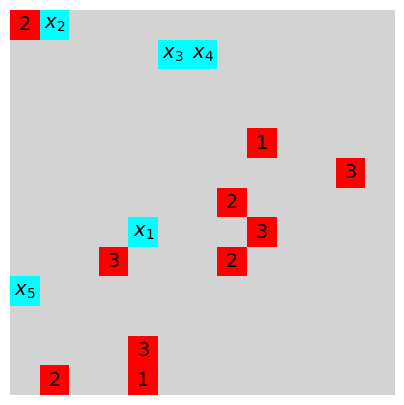

In [13]:
plot_game(grid)

In [7]:
# Allowed movements
MOVEMENTS = {
    'left': np.array([0,-1]), 
    'down':np.array([1,0]), 
    'right':np.array([0,1]), 
    'up':np.array([-1,0])
}

ACTIONS = list(MOVEMENTS.keys()) + ['collect', 'iop']
ACTIONS

['left', 'down', 'right', 'up', 'collect', 'iop']

In [130]:
# Reward for each time step
reward_timestep = -1

In [ ]:
def move(action, agent, grid):
    
    # We copy the grid so that our changes dont reflect on the grid
    grid = grid.copy()

    terminate = False

    reward = reward_timestep
    
    # If the action is not allowed (e.g. 'banana'), we raise an error
    if action not in MOVEMENTS.keys():
        raise ValueError(f'Possible movements are: { list(MOVEMENTS.keys()) }')
    
    # Otherwise, perform movement
    else:
        
        # Getting current position of the agent
        curr_pos = get_agent_pos(grid, agent)
        
        # Getting the next position. 
        # Note that if the action would take the agent outside the grid, the agent stays in place.
        next_pos = curr_pos + MOVEMENTS[action]
        next_pos[0] = np.clip(next_pos[0], 0, grid_shape[0]-1)
        next_pos[1] = np.clip(next_pos[1], 0, grid_shape[1]-1)
        
        # We remove the agent from its current position
        grid[*curr_pos] = 0
        
        # If the next position is a prize...
        if grid[*next_pos] == symbol_prize:
            
            # Get prize reward
            reward = reward_prize

            terminate = True
        
        # Place the agent in the next position
        grid[*next_pos] = symbol_agent
        
        return (grid, reward, terminate)

In [ ]:
def play(grid, policies):
    